In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path=os.getcwd()
#path

os.chdir(path+'/underground/')

g_shp=nx.read_shp('underground.shp',geom_attrs=False)

# We can print the dataframe from the shapefile to check the data
df = nx.to_pandas_edgelist(g_shp)
df.head(3)

# add station name to node
nod_st1={(e1):weight for e1, e2, weight in g_shp.edges(data='station_1_')}
nod_st2={(e2):weight for e1, e2, weight in g_shp.edges(data='station_2_')}

nod_all = nod_st1.copy()
nod_all.update(nod_st2)

nx.set_node_attributes(g_shp,nod_all,'station')

# convert to undirected
g_shp_un = g_shp.to_undirected()
# ID assignment
nod_coord = {(e1):e1 for e1 in g_shp_un.nodes()}
nx.set_node_attributes(g_shp_un,nod_coord,'station_coord')
#list(g_shp_un.nodes(data=True))[0:2]

node_list = list(g_shp_un.nodes())
mapping = {node_list[i]:i for i in range(len(node_list))}
g_shp_un = nx.relabel_nodes(g_shp_un, mapping)
#list(g_shp_un.nodes(data=True))[0:10]

nodes = [(x,y) for x,y in g_shp_un.nodes(data='station') if 'Heathrow' in str(y)]
#nodes

g_shp_un.nodes[258]['station']='Heathrow Terminals 123'

#g_shp_un.nodes[258]['station']

## betweenness 

In [3]:
g_shp_un_unsequential=g_shp_un.copy()

bet_london_w=nx.betweenness_centrality(g_shp_un_unsequential, weight='distance', normalized=False)

nx.set_node_attributes(g_shp_un_unsequential,bet_london_w,'betweenness_un')

from collections import OrderedDict

i=0
G=g_shp_un_unsequential
percent_lcc=[]

while i<31:
    dict_bet_un=dict(g_shp_un_unsequential.nodes(data=True))
    listbet_un=OrderedDict(sorted(dict_bet_un.items(), key=lambda x: x[1]['betweenness_un'],reverse=True))
    print(list(listbet_un.items())[0])
    g_shp_un_unsequential.remove_node(list(listbet_un.items())[0][0])
    Gcc = sorted(nx.connected_components(g_shp_un_unsequential), key=len, reverse=True)
    Gsub = g_shp_un_unsequential.subgraph(Gcc[0])
    percent = (len(Gsub.nodes)/len(g_shp_un_unsequential.nodes)) 
    percent_lcc.append(percent)
    i+=1

#list(listbet_un.items())[:3]
#len(list(g_shp_un_unsequential.nodes(data=True)))


R_index = pd.DataFrame(percent_lcc,columns=['sQ'])
R_in_be=[]
for i in R_index.index:
    l=i+1
    j=np.sum(R_index.sQ[0:l])
    k= j/(l)
    R_in_be.append(k)
    
    
R_index['R_in_be'] = np.array(R_in_be)
#R_index.dropna(subset=['R_in_be'],inplace=True)

import matplotlib.pyplot as plt

#plt.plot(R_index.index,R_index.R_in_be)
#plt.title('Impact of non-seuqential node removal with R-index')
#plt.xlabel('Nummer of removed nodes')
#plt.ylabel('R-index')
#plt.show()

#R_index.to_csv("R_index.csv")

(0, {'station': 'Baker Street', 'station_coord': (-0.1571, 51.5226), 'betweenness_un': 13194.0})
(25, {'station': 'Bank', 'station_coord': (-0.0886, 51.5133), 'betweenness_un': 11605.0})
(24, {'station': 'Oxford Circus', 'station_coord': (-0.1415, 51.515), 'betweenness_un': 10847.0})
(88, {'station': "King's Cross St. Pancras", 'station_coord': (-0.1238, 51.5308), 'betweenness_un': 10794.0})
(33, {'station': 'Bond Street', 'station_coord': (-0.1494, 51.5142), 'betweenness_un': 9597.0})
(96, {'station': 'Whitechapel', 'station_coord': (-0.0612, 51.5194), 'betweenness_un': 9500.0})
(95, {'station': 'Aldgate East', 'station_coord': (-0.0726, 51.5154), 'betweenness_un': 9334.0})
(116, {'station': "Earl's Court", 'station_coord': (-0.1973, 51.492), 'betweenness_un': 9201.0})
(26, {'station': 'Liverpool Street', 'station_coord': (-0.0823, 51.5178), 'betweenness_un': 9195.0})
(131, {'station': 'Stepney Green', 'station_coord': (-0.047, 51.5221), 'betweenness_un': 8652.0})
(32, {'station': 'Mi

In [4]:
R_index

,sQ,R_in_be
0,1.000000,1.000000
1,1.000000,1.000000
2,0.996700,0.998900
3,0.933775,0.982619
4,0.933555,0.972806
5,0.930000,0.965672
6,0.929766,0.960542
7,0.899329,0.952891
8,0.882155,0.945031
9,0.881757,0.938704


In [5]:
g_shp_un_sequential=g_shp_un.copy()

from collections import OrderedDict


i=0
G=g_shp_un_sequential
percent_lcc=[]

while i<31:
    bet_london_w=nx.betweenness_centrality(g_shp_un_sequential, weight='distance', normalized=False)

    nx.set_node_attributes(g_shp_un_sequential,bet_london_w,'betweenness_un')

    dict_bet_un=dict(g_shp_un_sequential.nodes(data=True))
    listbet_un=OrderedDict(sorted(dict_bet_un.items(), key=lambda x: x[1]['betweenness_un'],reverse=True))
    print(list(listbet_un.items())[0])
    g_shp_un_sequential.remove_node(list(listbet_un.items())[0][0])
    Gcc = sorted(nx.connected_components(g_shp_un_sequential), key=len, reverse=True)
    Gsub = g_shp_un_sequential.subgraph(Gcc[0])
    percent = (len(Gsub.nodes)/len(g_shp_un_sequential.nodes)) 
    percent_lcc.append(percent)
    i+=1

#list(listbet_un.items())[:15]
#len(list(g_shp_un_unsequential.nodes(data=True)))

#R_index=pd.dataframe(percent_lcc)
#R_index['R_in']=R_index.sQ
R_index_se = pd.DataFrame(percent_lcc,columns=['sQ'])
R_in_bese=[]
for i in R_index_se.index:
    l=i+1
    j=np.sum(R_index_se.sQ[0:l])
    k= j/l
    R_in_bese.append(k)
    
    
R_index_se['R_in_bese'] = np.array(R_in_bese)
#R_index_se.dropna(subset=['R_in_bese'],inplace=True)

import matplotlib.pyplot as plt

#plt.plot(R_index_se.index,R_index_se.R_in_bese)
#plt.title('Impact of node removal with R-index')
#plt.xlabel('Nummer of removed nodes')
#plt.ylabel('R-index')
#plt.show()

(0, {'station': 'Baker Street', 'station_coord': (-0.1571, 51.5226), 'betweenness_un': 13194.0})
(116, {'station': "Earl's Court", 'station_coord': (-0.1973, 51.492), 'betweenness_un': 16763.0})
(60, {'station': 'Notting Hill Gate', 'station_coord': (-0.1967, 51.5094), 'betweenness_un': 20017.0})
(88, {'station': "King's Cross St. Pancras", 'station_coord': (-0.1238, 51.5308), 'betweenness_un': 5722.0})
(25, {'station': 'Bank', 'station_coord': (-0.0886, 51.5133), 'betweenness_un': 5553.0})
(4, {'station': 'Embankment', 'station_coord': (-0.1223, 51.5074), 'betweenness_un': 5602.0})
(137, {'station': 'Canada Water', 'station_coord': (-0.0502, 51.4982), 'betweenness_un': 7346.0})
(115, {'station': 'Ealing Common', 'station_coord': (-0.2882, 51.5101), 'betweenness_un': 3108.0})
(66, {'station': 'Stratford', 'station_coord': (-0.0042, 51.5416), 'betweenness_un': 1543.0})
(155, {'station': 'Green Park', 'station_coord': (-0.1428, 51.5067), 'betweenness_un': 1291.0})
(158, {'station': 'Cann

In [6]:
R_index_se

,sQ,R_in_bese
0,1.000000,1.000000
1,0.970395,0.985197
2,0.633663,0.868019
3,0.569536,0.793399
4,0.568106,0.748340
5,0.566667,0.718061
6,0.341137,0.664215
7,0.315436,0.620618
8,0.245791,0.578970
9,0.246622,0.545735


## closeness

In [7]:
g_shp_un_unsequential=g_shp_un.copy()

#Weighted closeness centrality: 
clos_w=nx.closeness_centrality(g_shp_un_unsequential, distance='distance')
# We can add these values to the nodes attributes:
nx.set_node_attributes(g_shp_un_unsequential,clos_w,'closeness_w')

from collections import OrderedDict

i=0
G=g_shp_un_unsequential
percent_lcc=[]

while i<31:
    dict_bet_un=dict(g_shp_un_unsequential.nodes(data=True))
    listbet_un=OrderedDict(sorted(dict_bet_un.items(), key=lambda x: x[1]['closeness_w'],reverse=True))
    print(list(listbet_un.items())[0])
    g_shp_un_unsequential.remove_node(list(listbet_un.items())[0][0])
    Gcc = sorted(nx.connected_components(g_shp_un_unsequential), key=len, reverse=True)
    Gsub = g_shp_un_unsequential.subgraph(Gcc[0])
    percent = (len(Gsub.nodes)/len(g_shp_un_unsequential.nodes)) 
    percent_lcc.append(percent)
    i+=1

#list(listbet_un.items())[:3]
#len(list(g_shp_un_unsequential.nodes(data=True)))

R_index = pd.DataFrame(percent_lcc,columns=['sQ'])
R_in_clo=[]
for i in R_index.index:
    l=i+1
    j=np.sum(R_index.sQ[0:l])
    k= j/l
    R_in_clo.append(k)
    
    
R_index['R_in_clo'] = np.array(R_in_clo)
#R_index.dropna(subset=['R_in_clo'],inplace=True)

import matplotlib.pyplot as plt

#plt.plot(R_index.index,R_index.R_in_clo)
#plt.title('Impact of non-seuqential node removal with R-index')
#plt.xlabel('Nummer of removed nodes')
#plt.ylabel('R-index')
#plt.show()

(24, {'station': 'Oxford Circus', 'station_coord': (-0.1415, 51.515), 'closeness_w': 8.912373757112555e-05})
(58, {'station': 'Tottenham Court Road', 'station_coord': (-0.131, 51.5165), 'closeness_w': 8.854783127731213e-05})
(5, {'station': 'Picadilly Circus', 'station_coord': (-0.1342, 51.5098), 'closeness_w': 8.822764047514472e-05})
(39, {'station': 'Holborn', 'station_coord': (-0.12, 51.5174), 'closeness_w': 8.80925704759346e-05})
(218, {'station': 'Leicester Square', 'station_coord': (-0.1281, 51.5113), 'closeness_w': 8.804465520709892e-05})
(33, {'station': 'Bond Street', 'station_coord': (-0.1494, 51.5142), 'closeness_w': 8.795701126805857e-05})
(155, {'station': 'Green Park', 'station_coord': (-0.1428, 51.5067), 'closeness_w': 8.783888173444577e-05})
(3, {'station': 'Charing Cross', 'station_coord': (-0.1247, 51.508), 'closeness_w': 8.782122192519511e-05})
(4, {'station': 'Embankment', 'station_coord': (-0.1223, 51.5074), 'closeness_w': 8.756510086254292e-05})
(254, {'station': 

In [8]:
R_index

,sQ,R_in_clo
0,1.000000,1.000000
1,1.000000,1.000000
2,1.000000,1.000000
3,1.000000,1.000000
4,0.996678,0.999336
5,0.996667,0.998891
6,0.996656,0.998571
7,0.996644,0.998331
8,0.996633,0.998142
9,1.000000,0.998328


In [9]:
g_shp_un_sequential=g_shp_un.copy()

from collections import OrderedDict


i=0
#G=g_shp_un_sequential
percent_lcc=[]

while i<31:
    clos_w=nx.closeness_centrality(g_shp_un_sequential, distance='distance')
    nx.set_node_attributes(g_shp_un_sequential,clos_w,'closeness_w')
    dict_bet_un=dict(g_shp_un_sequential.nodes(data=True))
    listbet_un=OrderedDict(sorted(dict_bet_un.items(), key=lambda x: x[1]['closeness_w'],reverse=True))
    print(list(listbet_un.items())[0])
    g_shp_un_sequential.remove_node(list(listbet_un.items())[0][0])
    Gcc = sorted(nx.connected_components(g_shp_un_sequential), key=len, reverse=True)
    Gsub = g_shp_un_sequential.subgraph(Gcc[0])
    percent = (len(Gsub.nodes)/len(g_shp_un_sequential.nodes)) 
    percent_lcc.append(percent)
    i+=1

#list(listbet_un.items())[:15]
#len(list(g_shp_un_unsequential.nodes(data=True)))

R_index_se = pd.DataFrame(percent_lcc,columns=['sQ'])
R_in_clse=[]
for i in R_index_se.index:
    l=i+1
    j=np.sum(R_index_se.sQ[0:l])
    k= j/l
    R_in_clse.append(k)
    
    
R_index_se['R_in_clse'] = np.array(R_in_clse)
#R_index_se.dropna(subset=['R_in_clse'],inplace=True)

import matplotlib.pyplot as plt

#plt.plot(R_index_se.index,R_index_se.R_in_clse)
#plt.title('Impact of node removal with R-index')
#plt.xlabel('Nummer of removed nodes')
#plt.ylabel('R-index')
#plt.show()

(24, {'station': 'Oxford Circus', 'station_coord': (-0.1415, 51.515), 'closeness_w': 8.912373757112555e-05})
(5, {'station': 'Picadilly Circus', 'station_coord': (-0.1342, 51.5098), 'closeness_w': 8.714402018400067e-05})
(86, {'station': 'Westminster', 'station_coord': (-0.1254, 51.501), 'closeness_w': 8.59623265579132e-05})
(88, {'station': "King's Cross St. Pancras", 'station_coord': (-0.1238, 51.5308), 'closeness_w': 8.486214542003692e-05})
(221, {'station': 'Stockwell', 'station_coord': (-0.123, 51.4723), 'closeness_w': 6.734893677860242e-05})
(96, {'station': 'Whitechapel', 'station_coord': (-0.0612, 51.5194), 'closeness_w': 5.522026126273055e-05})
(25, {'station': 'Bank', 'station_coord': (-0.0886, 51.5133), 'closeness_w': 5.2185933576574814e-05})
(290, {'station': 'West India Quay', 'station_coord': (-0.0203, 51.507), 'closeness_w': 4.7487839936521154e-05})
(109, {'station': 'West Ham', 'station_coord': (0.0056, 51.5287), 'closeness_w': 4.41830486743841e-05})
(4, {'station': 'Em

In [10]:
R_index_se

,sQ,R_in_clse
0,1.000000,1.000000
1,1.000000,1.000000
2,1.000000,1.000000
3,0.943709,0.985927
4,0.471761,0.883094
5,0.466667,0.813689
6,0.464883,0.763860
7,0.463087,0.726263
8,0.444444,0.694950
9,0.445946,0.670050


## degree

In [11]:
g_shp_un_unsequential=g_shp_un.copy()

degree_london_w=nx.degree(g_shp_un_unsequential)

nx.set_node_attributes(g_shp_un_unsequential,dict(degree_london_w),'degree_un')

from collections import OrderedDict

i=0
#G=g_shp_un_unsequential
percent_lcc=[]

while i<31:
    dict_bet_un=dict(g_shp_un_unsequential.nodes(data=True))
    listbet_un=OrderedDict(sorted(dict_bet_un.items(), key=lambda x: x[1]['degree_un'],reverse=True))
    print(list(listbet_un.items())[0])
    g_shp_un_unsequential.remove_node(list(listbet_un.items())[0][0])
    Gcc = sorted(nx.connected_components(g_shp_un_unsequential), key=len, reverse=True)
    Gsub = g_shp_un_unsequential.subgraph(Gcc[0])
    percent = (len(Gsub.nodes)/len(g_shp_un_unsequential.nodes)) 
    percent_lcc.append(percent)
    i+=1

#list(listbet_un.items())[:3]
#len(list(g_shp_un_unsequential.nodes(data=True)))

R_index = pd.DataFrame(percent_lcc,columns=['sQ'])
R_in_de=[]
for i in R_index.index:
    l=i+1
    j=np.sum(R_index.sQ[0:l])
    k= j/l
    R_in_de.append(k)
    
    
#R_index['R_in_de'] = np.array(R_in_de)
#R_index.dropna(subset=['R_in_de'],inplace=True)

import matplotlib.pyplot as plt

#plt.plot(R_index.index,R_index.R_in_de)
#plt.title('Impact of non-seuqential node removal with R-index')
#plt.xlabel('Nummer of removed nodes')
#plt.ylabel('R-index')
#plt.show()

#R_index.to_csv("R_index.csv")

(0, {'station': 'Baker Street', 'station_coord': (-0.1571, 51.5226), 'degree_un': 7})
(88, {'station': "King's Cross St. Pancras", 'station_coord': (-0.1238, 51.5308), 'degree_un': 7})
(10, {'station': 'Waterloo', 'station_coord': (-0.1143, 51.5036), 'degree_un': 6})
(24, {'station': 'Oxford Circus', 'station_coord': (-0.1415, 51.515), 'degree_un': 6})
(25, {'station': 'Bank', 'station_coord': (-0.0886, 51.5133), 'degree_un': 6})
(116, {'station': "Earl's Court", 'station_coord': (-0.1973, 51.492), 'degree_un': 6})
(155, {'station': 'Green Park', 'station_coord': (-0.1428, 51.5067), 'degree_un': 6})
(7, {'station': 'Paddington', 'station_coord': (-0.1755, 51.5154), 'degree_un': 5})
(26, {'station': 'Liverpool Street', 'station_coord': (-0.0823, 51.5178), 'degree_un': 5})
(112, {'station': 'Turnham Green', 'station_coord': (-0.2547, 51.4951), 'degree_un': 5})
(143, {'station': 'Shadwell', 'station_coord': (-0.056, 51.5117), 'degree_un': 5})
(158, {'station': 'Canning Town', 'station_coo

In [12]:
g_shp_un_sequential=g_shp_un.copy()

from collections import OrderedDict


i=0
#G=g_shp_un_sequential
percent_lcc=[]

while i<31:
    degree_london_w=nx.degree(g_shp_un_sequential)

    nx.set_node_attributes(g_shp_un_sequential,dict(degree_london_w),'degree_un')

    dict_bet_un=dict(g_shp_un_sequential.nodes(data=True))
    listbet_un=OrderedDict(sorted(dict_bet_un.items(), key=lambda x: x[1]['degree_un'],reverse=True))
    print(list(listbet_un.items())[0])
    g_shp_un_sequential.remove_node(list(listbet_un.items())[0][0])
    Gcc = sorted(nx.connected_components(g_shp_un_sequential), key=len, reverse=True)
    Gsub = g_shp_un_sequential.subgraph(Gcc[0])
    percent = (len(Gsub.nodes)/len(g_shp_un_sequential.nodes)) 
    percent_lcc.append(percent)
    i+=1

#list(listbet_un.items())[:15]
#len(list(g_shp_un_unsequential.nodes(data=True)))

R_index_se = pd.DataFrame(percent_lcc,columns=['sQ'])
R_in_dese=[]
for i in R_index_se.index:
    l=i+1
    j=np.sum(R_index_se.sQ[0:l])
    k= j/l
    R_in_dese.append(k)
    
    
R_index_se['R_in_dese'] = np.array(R_in_dese)
#R_index_se.dropna(subset=['R_in_dese'],inplace=True)

import matplotlib.pyplot as plt

#plt.plot(R_index_se.index,R_index_se.R_in_dese)
#plt.title('Impact of node removal with R-index')
#plt.xlabel('Nummer of removed nodes')
#plt.ylabel('R-index')
#plt.show()

(0, {'station': 'Baker Street', 'station_coord': (-0.1571, 51.5226), 'degree_un': 7})
(88, {'station': "King's Cross St. Pancras", 'station_coord': (-0.1238, 51.5308), 'degree_un': 7})
(10, {'station': 'Waterloo', 'station_coord': (-0.1143, 51.5036), 'degree_un': 6})
(24, {'station': 'Oxford Circus', 'station_coord': (-0.1415, 51.515), 'degree_un': 6})
(116, {'station': "Earl's Court", 'station_coord': (-0.1973, 51.492), 'degree_un': 6})
(7, {'station': 'Paddington', 'station_coord': (-0.1755, 51.5154), 'degree_un': 5})
(25, {'station': 'Bank', 'station_coord': (-0.0886, 51.5133), 'degree_un': 5})
(112, {'station': 'Turnham Green', 'station_coord': (-0.2547, 51.4951), 'degree_un': 5})
(155, {'station': 'Green Park', 'station_coord': (-0.1428, 51.5067), 'degree_un': 5})
(158, {'station': 'Canning Town', 'station_coord': (0.0082, 51.5147), 'degree_un': 5})
(26, {'station': 'Liverpool Street', 'station_coord': (-0.0823, 51.5178), 'degree_un': 4})
(32, {'station': 'Mile End', 'station_coor

## plot all

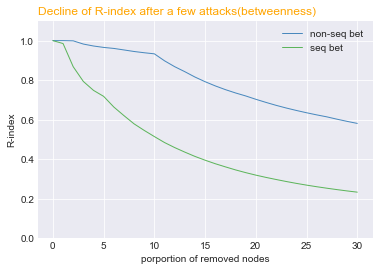

In [17]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
n=len(g_shp_un.nodes)    
# Make a data frame
df=pd.DataFrame({'x' : R_index.index, 
                 'non-seq bet': np.array(R_in_be),
                 'seq bet': np.array(R_in_bese)})
 
plt.ylim(ymin=0)
plt.ylim(ymax=1.1)    
    
# Change the style of plot
plt.style.use('seaborn-darkgrid')
 
# Create a color palette
palette = plt.get_cmap('Set1')
 
# Plot multiple lines
num=0
for column in df.drop('x', axis=1):
    num+=1
    plt.plot(df['x'], df[column], marker='', color=palette(num), linewidth=1, alpha=0.9, label=column)

# Add legend
plt.legend(loc=1, ncol=1)
 
# Add titles
plt.title("Decline of R-index after a few attacks(betweenness)", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("porportion of removed nodes")
plt.ylabel("R-index")

# Show the graph
plt.show()

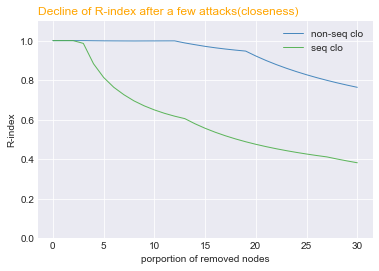

In [14]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
n=len(g_shp_un.nodes)    
# Make a data frame
df=pd.DataFrame({'x' : R_index.index, 
                 'non-seq clo': np.array(R_in_clo),
                 'seq clo': np.array(R_in_clse)})

plt.ylim(ymin=0)
plt.ylim(ymax=1.1)

# Change the style of plot
plt.style.use('seaborn-darkgrid')
 
# Create a color palette
palette = plt.get_cmap('Set1')
 
# Plot multiple lines
num=0
for column in df.drop('x', axis=1):
    num+=1
    plt.plot(df['x'], df[column], marker='', color=palette(num), linewidth=1, alpha=0.9, label=column)

# Add legend
plt.legend(loc=1, ncol=1)
 
# Add titles
plt.title("Decline of R-index after a few attacks(closeness)", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("porportion of removed nodes")
plt.ylabel("R-index")

# Show the graph
plt.show()

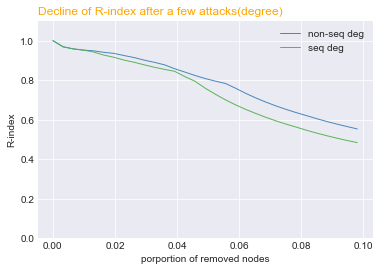

In [15]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
n=len(g_shp_un.nodes)    
# Make a data frame
df=pd.DataFrame({'x' : R_index.index/n,
                 'non-seq deg': np.array(R_in_de), 
                 'seq deg': np.array(R_in_dese)})
 
# Change the style of plot
plt.style.use('seaborn-darkgrid')
 
# Create a color palette
palette = plt.get_cmap('Set1')
 
# Plot multiple lines
num=0
for column in df.drop('x', axis=1):
    num+=1
    plt.plot(df['x'], df[column], marker='', color=palette(num), linewidth=1, alpha=0.9, label=column)

# Add legend
plt.legend(loc=1, ncol=1)
 
plt.ylim(ymin=0)
plt.ylim(ymax=1.1)    
    
# Add titles
plt.title("Decline of R-index after a few attacks(degree)", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("porportion of removed nodes")
plt.ylabel("R-index")

# Show the graph
plt.show()

In [16]:
np.array(R_in_dese)

array([1.        , 0.96875   , 0.95826458, 0.95214214, 0.94244461,
       0.92703717, 0.9159602 , 0.90171685, 0.89056462, 0.87752167,
       0.86523542, 0.8546404 , 0.84481902, 0.81823215, 0.79461117,
       0.75981866, 0.72916782, 0.70061837, 0.67511361, 0.65219709,
       0.63149932, 0.61175767, 0.59376298, 0.57729709, 0.56217674,
       0.54659851, 0.53219509, 0.51884074, 0.50642709, 0.49486019,
       0.48405825])